In [196]:
'''
findcontours 具体使用
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img):
    # fig = plt.figure(figsize=(10, 10))
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img, cmap="gray")
    plt.show()


# 绘制矩形
# def draw_rect(img, x1,y1,s1,s2x,s2y):
#     img[x1:x1+s1, y1:y1+s2y] = 255
#     img[x1:x1+s2x, y1:y1+s1] = 255

#     img[x1+s2x-s1:x1+s2x, y1:y1+s2y] = 255
#     img[x1:x1+s2x, y1-s1+s2y:y1+s2y] = 255
#     return img

# img = np.zeros((100, 100))
# img = draw_rect(img, 10, 5, 1, 35, 35)
# img = draw_rect(img, 55, 5, 10, 35, 35)
# img = draw_rect(img, 15, 50, 5, 70, 45)
# img = draw_rect(img, 25, 60, 1, 20, 25)
# img = draw_rect(img, 55, 60, 5, 20, 25)
# show_image(img)

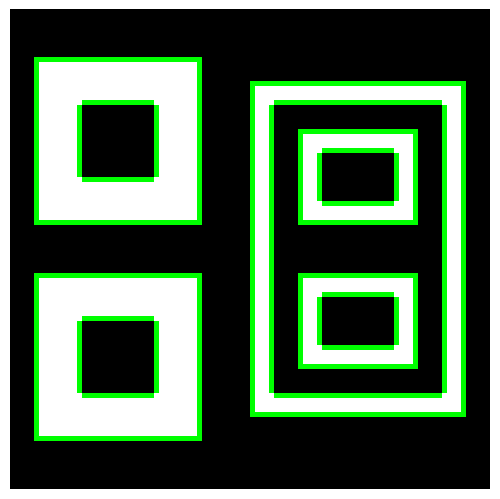

In [191]:
# 1. 解析返回值的 contours
# 先不管传入的参数，反正返回了两个信息: contours, hierachy
src = cv2.imread('./image/findcontours-1.png', -1)
contours, hierachy = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# 解析轮廓信息，用绿色画出来
dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    # 第 i 个轮廓的信息，假设有 n 个 点
    now_contours = contours[i] # (n, 1, 2)
    now_hierachy = hierachy[0][i] # (4)

    # ! 画出轮廓，注意返回的 contours 中顺序是 纵坐标、横坐标
    point_set = now_contours[:, 0]
    dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]

show_image(dst)

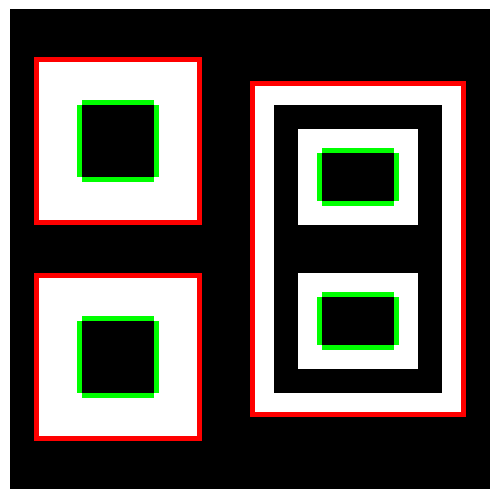

In [192]:
# 2. 解析返回值的 hierachy
# 先不管传入的参数，反正返回了两个信息: contours, hierachy
src = cv2.imread('./image/findcontours-1.png', -1)
contours, hierachy = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# 利用 hierachy 信息画出最里面的轮廓（绿色）、最外面轮廓信息（红色）
dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    # 第 i 个轮廓的信息，假设有 n 个 点
    now_contours = contours[i] # (n, 1, 2)
    now_hierachy = hierachy[0][i] # (4)

    # ! 现在添加了判断，利用 hierachy，该信息四个值分别为:
    # the next and previous contours at the same hierarchical level, the first child contour and the parent contour
    # If for the contour i there are no next, previous, parent, or nested contours, the corresponding elements will be negative.

    # 如果 child 为 负数，说明这个轮廓是最里面的轮廓了
    if now_hierachy[2] < 0:
        point_set = now_contours[:, 0]
        dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]

    # 如果 parent 为 负数，说明这个轮廓是最外面的轮廓了
    if now_hierachy[3] < 0:
        point_set = now_contours[:, 0]
        dst[point_set[:, 1], point_set[:, 0]] = [255, 0, 0]

show_image(dst)

RETR_EXTERNAL 只找外部


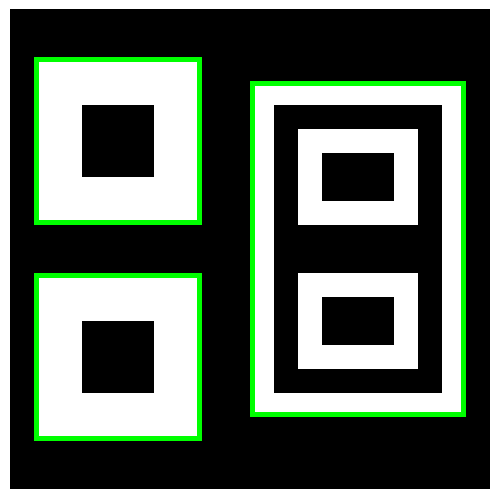

RETR_LIST 不管继承信息


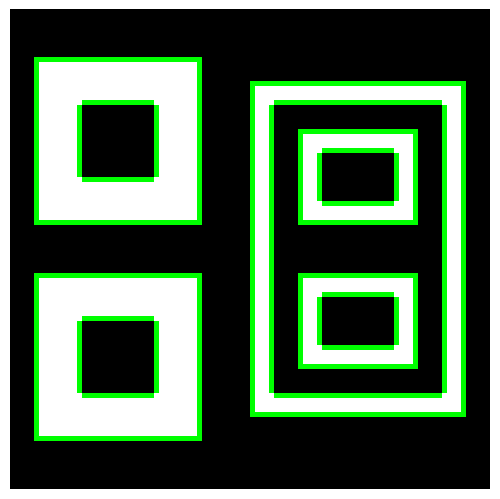

RETR_CCOMP 只有两个层级


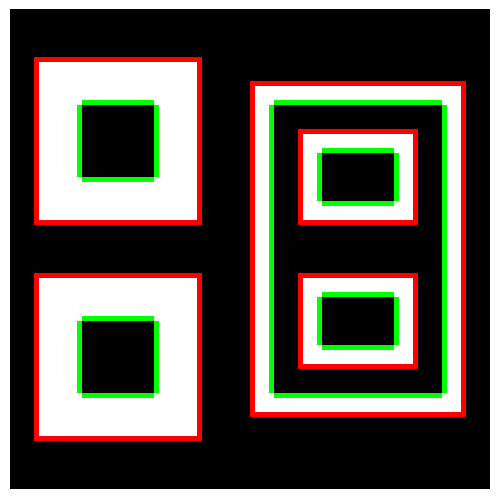

RETR_TREE 所有信息


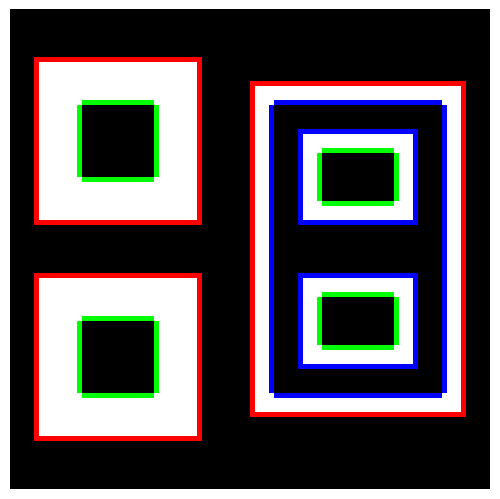

In [198]:
# 3. 不同 mode 的比较
modes = {cv2.RETR_EXTERNAL, cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE}
explains = {
    'RETR_EXTERNAL': '只找外部',
    'RETR_LIST': '不管继承信息',
    'RETR_CCOMP': '只有两个层级',
    'RETR_TREE': '所有信息',
}

src = cv2.imread('./image/findcontours-1.png', -1)
for modename, mode in zip(explains, modes):
    contours, hierachy = cv2.findContours(src, mode, method=cv2.CHAIN_APPROX_NONE)

    # 利用 hierachy 信息画出最里面的轮廓（绿色）、最外面轮廓信息（红色）
    dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
    for i in range(len(contours)):
        # 第 i 个轮廓的信息，假设有 n 个 点
        now_contours = contours[i] # (n, 1, 2)
        now_hierachy = hierachy[0][i] # (4)

        point_set = now_contours[:, 0]
        # 如果 child 为 负数，说明这个轮廓是最里面的轮廓了
        if now_hierachy[2] < 0:
            dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]
            continue

        # 如果 parent 为 负数，说明这个轮廓是最外面的轮廓了
        if now_hierachy[3] < 0:
            dst[point_set[:, 1], point_set[:, 0]] = [255, 0, 0]
            continue
        
        dst[point_set[:, 1], point_set[:, 0]] = [0, 0, 255]
        
    print(modename, explains[modename])
    show_image(dst)
    plt.show()

黑白颠倒后结果


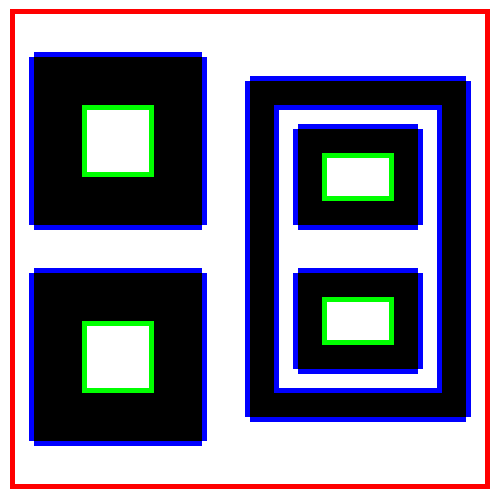

In [212]:
# 4. 注意点：找的是白色物体的轮廓
src = cv2.imread('./image/findcontours-1.png', -1)
src = cv2.bitwise_not(src)
contours, hierachy = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# 利用 hierachy 信息画出最里面的轮廓（绿色）、最外面轮廓信息（红色）
dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    # 第 i 个轮廓的信息，假设有 n 个 点
    now_contours = contours[i] # (n, 1, 2)
    now_hierachy = hierachy[0][i] # (4)

    point_set = now_contours[:, 0]
    # 如果 child 为 负数，说明这个轮廓是最里面的轮廓了
    if now_hierachy[2] < 0:
        dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]
        continue

    # 如果 parent 为 负数，说明这个轮廓是最外面的轮廓了
    if now_hierachy[3] < 0:
        dst[point_set[:, 1], point_set[:, 0]] = [255, 0, 0]
        continue
    
    dst[point_set[:, 1], point_set[:, 0]] = [0, 0, 255]
    
print('黑白颠倒后结果')
show_image(dst)
plt.show()

一条细线外轮廓和内轮廓都是一样的


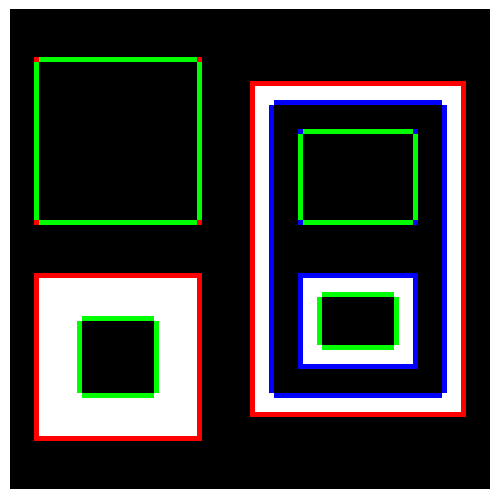

In [211]:
# 5. 注意点：一条细线可能有问题，此时判断的外轮廓和内轮廓是一样的
src = cv2.imread('./image/findcontours-2.png', -1)
contours, hierachy = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# 利用 hierachy 信息画出最里面的轮廓（绿色）、最外面轮廓信息（红色）
dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    # 第 i 个轮廓的信息，假设有 n 个 点
    now_contours = contours[i] # (n, 1, 2)
    now_hierachy = hierachy[0][i] # (4)

    point_set = now_contours[:, 0]
    # 如果 child 为 负数，说明这个轮廓是最里面的轮廓了
    if now_hierachy[2] < 0:
        dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]
        continue

    # 如果 parent 为 负数，说明这个轮廓是最外面的轮廓了
    if now_hierachy[3] < 0:
        dst[point_set[:, 1], point_set[:, 0]] = [255, 0, 0]
        continue
    
    dst[point_set[:, 1], point_set[:, 0]] = [0, 0, 255]
    
print('一条细线外轮廓和内轮廓都是一样的，因此要注意一条细线的场景')
show_image(dst)
plt.show()